# DNN

In [7]:
import os
import sys
from glob import glob
import random
import string
import yaml
import pandas as pd
import root_pandas as rpd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
from collections import defaultdict
import ROOT
import copy
import tensorflow.keras
import tensorflow.saved_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Normalization
from tensorflow.keras.callbacks import Callback
from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import plot_model
#from tensorflow.keras.utils.vis_utils import plot_model                                                                                                                
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import model_from_json
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from pickle import dump

feature list : ['pt_tauh', 'met', 'pt_leadbj', 'pt_xlep', 'pt_wlep', 'vectorsumpt_xlep_wlep', 'dr_xlep_wlep', 'dphi_wlep_tauh', 'dphi_wlep_leadbj', 'ht_jets', 'dr_min_xlep_jets', 'dr_min_wlep_jets', 'dphi_xlep_tauh', 'effectivemass', 'dr_min_jets', 'mt_wlep_met', 'dphi_tauh_leadbj', 'dphi_met_xlep', 'dphi_met_wlep', 'dphi_leadbj_leadlj', 'smin']
Learning rate : 0.0001
Batch size : 3000
[['/home/gsaha/Work/Delphes_Analyses/Project_FCNC_TTbar/JobOutput_MX_100/results/Sig_MX_100_MH_160_DL_mvaIn.root', 0.0225, 700000, 'signal']]
[['/home/gsaha/Work/Delphes_Analyses/Project_FCNC_TTbar/JobOutput_MX_60/results/Bkg_TTJets_DiLep_Set_New_DL_BDTD_mvaIn.root', 109.8, 10855428, 'TT + Jets'], ['/home/gsaha/Work/Delphes_Analyses/Project_FCNC_TTbar/JobOutput_MX_60/results/Bkg_TTWJetsToLNu_DL_BDTD_mvaIn.root', 0.25, 4765526, 'TTV + Jets'], ['/home/gsaha/Work/Delphes_Analyses/Project_FCNC_TTbar/JobOutput_MX_60/results/Bkg_TTZJetsToLL_DL_BDTD_mvaIn.root', 0.24, 2584012, 'TTV + Jets']]
No of signal proces

34/34 [==============================] - 1s 35ms/step - loss: 2.9252 - categorical_accuracy: 0.6893 - auc_2: 0.7510 - precision_2: 0.6893 - recall_2: 0.6893 - val_loss: 3.0414 - val_categorical_accuracy: 0.3144 - val_auc_2: 0.3617 - val_precision_2: 0.3144 - val_recall_2: 0.3144
Epoch 15/300
34/34 [==============================] - 1s 36ms/step - loss: 2.7408 - categorical_accuracy: 0.6912 - auc_2: 0.7529 - precision_2: 0.6912 - recall_2: 0.6912 - val_loss: 2.8531 - val_categorical_accuracy: 0.3310 - val_auc_2: 0.3796 - val_precision_2: 0.3310 - val_recall_2: 0.3310
Epoch 16/300
34/34 [==============================] - 1s 35ms/step - loss: 2.5713 - categorical_accuracy: 0.6944 - auc_2: 0.7562 - precision_2: 0.6944 - recall_2: 0.6944 - val_loss: 2.6741 - val_categorical_accuracy: 0.3556 - val_auc_2: 0.4075 - val_precision_2: 0.3556 - val_recall_2: 0.3556
Epoch 17/300
34/34 [==============================] - 1s 36ms/step - loss: 2.4139 - categorical_accuracy: 0.6957 - auc_2: 0.7589 - pre

34/34 [==============================] - 1s 35ms/step - loss: 0.8213 - categorical_accuracy: 0.7182 - auc_2: 0.7872 - precision_2: 0.7182 - recall_2: 0.7182 - val_loss: 0.9381 - val_categorical_accuracy: 0.5382 - val_auc_2: 0.5724 - val_precision_2: 0.5382 - val_recall_2: 0.5382
Epoch 43/300
34/34 [==============================] - 1s 35ms/step - loss: 0.8036 - categorical_accuracy: 0.7197 - auc_2: 0.7883 - precision_2: 0.7197 - recall_2: 0.7197 - val_loss: 0.9171 - val_categorical_accuracy: 0.5473 - val_auc_2: 0.5771 - val_precision_2: 0.5473 - val_recall_2: 0.5473
Epoch 44/300
34/34 [==============================] - 1s 34ms/step - loss: 0.7859 - categorical_accuracy: 0.7201 - auc_2: 0.7896 - precision_2: 0.7201 - recall_2: 0.7201 - val_loss: 0.8845 - val_categorical_accuracy: 0.5665 - val_auc_2: 0.6067 - val_precision_2: 0.5665 - val_recall_2: 0.5665
Epoch 45/300
34/34 [==============================] - 1s 35ms/step - loss: 0.7694 - categorical_accuracy: 0.7211 - auc_2: 0.7903 - pre

34/34 [==============================] - 1s 33ms/step - loss: 0.5976 - categorical_accuracy: 0.7315 - auc_2: 0.8020 - precision_2: 0.7315 - recall_2: 0.7315 - val_loss: 0.6716 - val_categorical_accuracy: 0.6499 - val_auc_2: 0.6978 - val_precision_2: 0.6499 - val_recall_2: 0.6499
Epoch 71/300
34/34 [==============================] - 1s 33ms/step - loss: 0.5945 - categorical_accuracy: 0.7299 - auc_2: 0.8021 - precision_2: 0.7299 - recall_2: 0.7299 - val_loss: 0.6563 - val_categorical_accuracy: 0.6613 - val_auc_2: 0.7140 - val_precision_2: 0.6613 - val_recall_2: 0.6613
Epoch 72/300
34/34 [==============================] - 1s 33ms/step - loss: 0.5911 - categorical_accuracy: 0.7310 - auc_2: 0.8034 - precision_2: 0.7310 - recall_2: 0.7310 - val_loss: 0.6714 - val_categorical_accuracy: 0.6421 - val_auc_2: 0.6895 - val_precision_2: 0.6421 - val_recall_2: 0.6421
Epoch 73/300
34/34 [==============================] - 1s 33ms/step - loss: 0.5892 - categorical_accuracy: 0.7321 - auc_2: 0.8038 - pre

34/34 [==============================] - 1s 34ms/step - loss: 0.5619 - categorical_accuracy: 0.7348 - auc_2: 0.8068 - precision_2: 0.7348 - recall_2: 0.7348 - val_loss: 0.5799 - val_categorical_accuracy: 0.7168 - val_auc_2: 0.7769 - val_precision_2: 0.7168 - val_recall_2: 0.7168
Epoch 99/300
34/34 [==============================] - 1s 35ms/step - loss: 0.5611 - categorical_accuracy: 0.7354 - auc_2: 0.8078 - precision_2: 0.7354 - recall_2: 0.7354 - val_loss: 0.5935 - val_categorical_accuracy: 0.7132 - val_auc_2: 0.7653 - val_precision_2: 0.7132 - val_recall_2: 0.7132

Epoch 00099: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
Epoch 100/300
34/34 [==============================] - 1s 35ms/step - loss: 0.5577 - categorical_accuracy: 0.7372 - auc_2: 0.8100 - precision_2: 0.7372 - recall_2: 0.7372 - val_loss: 0.6013 - val_categorical_accuracy: 0.6929 - val_auc_2: 0.7521 - val_precision_2: 0.6929 - val_recall_2: 0.6929
Epoch 101/300
34/34 [==============================]

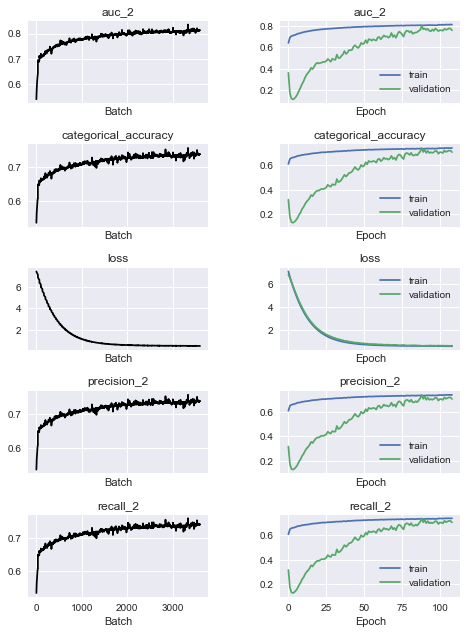

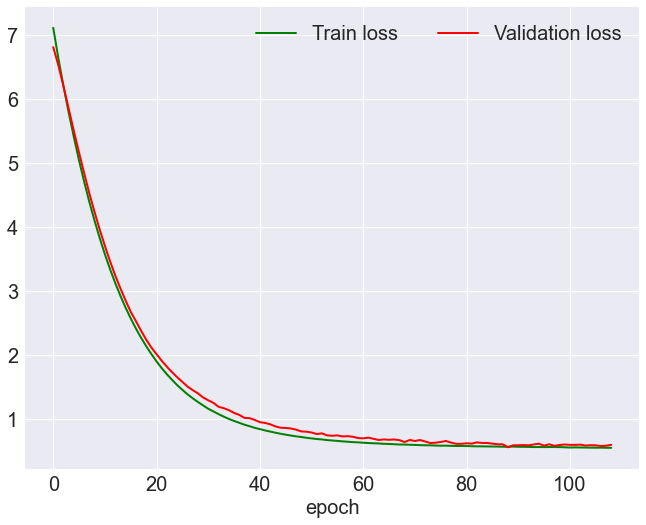

<Figure size 576x396 with 0 Axes>

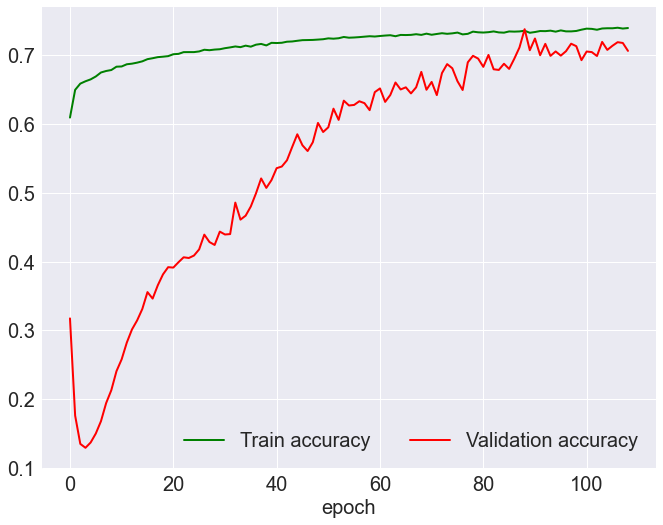

Saved model to disk


'    \nelse:\n    json_file  = open(os.path.join(tagdir,"DNN_model.json"), \'r\')\n    model_json = json_file.read()\n    json_file.close()\n    model = model_from_json(model_json)\n    # load weights into new model                                                                                                                             \n    model.load_weights(os.path.join(tagdir,"DNN_model.h5"))\n    print("Loaded model from disk")\n\n    print(model)\n'

<Figure size 576x396 with 0 Axes>

In [8]:
# Load config
### open config.yaml and get all the necessary parameters
with open('config_train_MX100_DL.yaml', 'r') as inf:
    config = yaml.safe_load(inf)
    
mainkeys    = list(config.keys())
tag         = config.get('Tag')
tagdir      = os.path.join(os.getcwd(),tag)

if not os.path.exists(tagdir):
    os.mkdir(tagdir)
else:
    print(f'{tagdir} already exists ...')

maintree       = config.get('intree')
infiledict     = config.get('infiles')
featuredict    = config.get('features')
featurelist    = list(featuredict.keys())
print(f'feature list : {featurelist}')
signaldict     = infiledict.get('Signal')
backgrounddict = infiledict.get('Background')
scale          = config.get('DoScaling')
dotrain        = config.get('DoTrain')

modelparamdict = config.get('modelParams')
LayerDims   = modelparamdict.get('Layers')
IsBatchNorm = modelparamdict.get('BatchNorms')
DropOuts    = modelparamdict.get('Dropout')
L2regs      = modelparamdict.get('L2')
Activations = modelparamdict.get('activ')

trainingparamdict = config.get('trainingParams')
LossFunc = trainingparamdict.get('Loss')
LRate    = trainingparamdict.get('LR')
print(f'Learning rate : {LRate}')
Metrics  = trainingparamdict.get('Metrics')
valSplit = trainingparamdict.get('valSplit')
nEpoch   = trainingparamdict.get('epoch') 
opt      = tensorflow.keras.optimizers.Adam(learning_rate=LRate)
batchsize = trainingparamdict.get('BatchSize')
print(f'Batch size : {batchsize}')

# Prepare train-test datasets (panda df)
### Use root_panda to get the event info from root files
############ plot function for input features ############
def plotinputfeatures(featurelist, tag=''):
    for feat in featurelist:
        feat_info = featuredict.get(feat)
        nbins  = feat_info[0]
        xlow   = feat_info[1]
        xhigh  = feat_info[2]
        nbins_ = np.linspace(xlow, xhigh, nbins)
        feat_sig = df_total_signal[feat].to_numpy()
        feat_bkg = df_total_background[feat].to_numpy()
        y_s,bins_s,patches_s = plt.hist(feat_sig,nbins_,density=True,histtype='bar',
                                        alpha=0.5,lw=2,log=False, label = 'Signal')
        y_b,bins_b,patches_b = plt.hist(feat_bkg,nbins_,density=True,histtype='bar',
                                        alpha=0.5,lw=2,log=False, label = 'Background')
    
        plt.xlabel(feat, fontsize=18)
        plt.ylabel('Normalised events', fontsize=18)
        plt.xticks(size = 18)
        plt.yticks(size = 18)
        plt.legend(loc='best', fontsize=16)
        plt.grid(True)
        
        plt.savefig(os.path.join(tagdir,feat+tag+'.png'), dpi=300)
        plt.show()
        plt.clf()
##########################################################
def PlotHistory(history):
    """ Takes history from Keras training and makes loss plots (batch and epoch) and learning rate plots """
    #----- Figure -----#
    variables = sorted([key for key in history.epochs.keys() if 'val' not in key and 'val_'+key in history.epochs.keys()])
    #variables += ["lr"]
    N = len(variables)
    fig, ax = plt.subplots(N,2,figsize=(12,N*2),sharex='col')
    plt.subplots_adjust(left    = 0.1,
                        right   = 0.6,
                        top     = 0.9,
                        bottom  = 0.1,
                        hspace  = 0.5,
                        wspace  = 0.4)
    
    #----- Batch Plots -----#
    for i,var in enumerate(variables):
        ax[i,0].plot(history.batches['batch'],history.batches[var],'k')
        ax[i,0].set_title(var)
        ax[i,0].set_xlabel('Batch')
        
    #----- Epoch Plots -----#
    for i,var in enumerate(variables):
        ax[i,1].plot(history.epochs['epoch'],history.epochs[var],label='train')
        if 'val_'+var in history.epochs.keys():
            ax[i,1].plot(history.epochs['epoch'],history.epochs['val_'+var],label='validation')
        ax[i,1].set_title(var)
        ax[i,1].legend()
        ax[i,1].set_xlabel('Epoch')

    # Save #
    rand_hash = ''.join(random.choice(string.ascii_uppercase) for _ in range(10)) # avoids overwritting
    png_name = 'Loss_%s.png'%rand_hash
    fig.savefig(os.path.join(tagdir,png_name), dpi=300)
    print('Curves saved as %s'%png_name)
#######################################################

##################################################################
##################################################################
signal_info_list     = list(signaldict.values())
background_info_list = list(backgrounddict.values())

print(signal_info_list)
print(background_info_list)

dfs_signal     = []
dfs_background = []
for item in signal_info_list:
    path   = item[0]
    clswt  = item[1] # xsec
    dfitem = rpd.read_root(path, key=maintree)[featurelist]
    dfitem['tag'] = 1
    dfs_signal.append(dfitem)

for item in background_info_list:
    path  = item[0]
    clswt = item[1] # xsec
    dfitem = rpd.read_root(path, key=maintree)[featurelist]
    dfitem['tag'] = 0
    dfs_background.append(dfitem)

print(f'No of signal processes : {len(dfs_signal)}, bkg processes : {len(dfs_background)}')

df_total_signal = pd.concat(dfs_signal) # panda df for all signals
df_total_background = pd.concat(dfs_background) # panda df for all backgrounds

#plotinputfeatures(featurelist, tag='_raw')

sigtrain,  sigtest  = train_test_split(dfs_signal[0],     test_size=0.2, random_state=42, shuffle=True)
bkg1train, bkg1test = train_test_split(dfs_background[0], test_size=0.2, random_state=42, shuffle=True)
bkg2train, bkg2test = train_test_split(dfs_background[1], test_size=0.2, random_state=42, shuffle=True)
bkg3train, bkg3test = train_test_split(dfs_background[2], test_size=0.2, random_state=42, shuffle=True)

df_train = pd.concat([sigtrain,bkg1train,bkg2train,bkg3train])
#df_train = pd.concat([sigtrain,bkg1train])
df_train.sample(frac=1)
df_test  = pd.concat([sigtest,bkg1test,bkg2test,bkg3test])
#df_test  = pd.concat([sigtest,bkg1test])
df_test.sample(frac=1)

print(f'\ntotal  ---> train : {df_train.shape}  test : {df_test.shape}')
print(f'signal--> train : {sigtrain.shape} test : {sigtest.shape} train_frac : {100*sigtrain.shape[0]/df_train.shape[0]}')
print(f'bkg1  --> train : {bkg1train.shape} test : {bkg1test.shape} train_frac : {100*bkg1train.shape[0]/df_train.shape[0]}')
print(f'bkg2  --> train : {bkg2train.shape} test : {bkg2test.shape} train_frac : {100*bkg2train.shape[0]/df_train.shape[0]}')
print(f'bkg3  --> train : {bkg3train.shape} test : {bkg3test.shape} train_frac : {100*bkg3train.shape[0]/df_train.shape[0]}')

'''
# Correlation matrices
### Both for signal and background
################### For Correlation matrix ######################
df_sig = (pd.concat(dfs_signal)).iloc[:,:-1]
df_bkg = (pd.concat(dfs_background)).iloc[:,:-1]
corrlMatrix_sig = df_sig.corr()
corrlMatrix_bkg = df_bkg.corr()

plt.figure(figsize=(15,12.5))
sns.heatmap(corrlMatrix_sig, cmap='YlGnBu', annot=True, annot_kws={'size':13}, fmt='.2f')
plt.title('Correlation Matrix [Signal]')
plt.savefig(os.path.join(tagdir,'Corr_matrix_signal.png'), dpi=300)
plt.show()
plt.clf()
plt.figure(figsize=(15,12.5))
sns.heatmap(corrlMatrix_bkg, cmap='YlGnBu', annot=True, annot_kws={'size':13}, fmt='.2f')
plt.title('Correlation Matrix [Background]')
plt.savefig(os.path.join(tagdir,'Corr_matrix_bkg.png'), dpi=300)
plt.show()
plt.clf()
#################################################################
'''
# Prepare train and test datasets
np_train = df_train.to_numpy()
np_test  = df_test.to_numpy()

x_train = np_train[:,:np_train.shape[1]-1]
y_train = np_train[:,-1].reshape(-1,1)
y_train = to_categorical(y_train, 2)
print(f'Shape of x_train : {x_train.shape}')
x_test  = np_test[:,:np_test.shape[1]-1]
y_test  = np_test[:,-1].reshape(-1,1)
y_test  = to_categorical(y_test, 2)
print(f'Shape of x_test : {x_test.shape}')

print(f'Train --> Sig : {np.sum(y_train > 0)}   Bkg : {np.sum(y_train < 1)}')
print(f'Test  --> Sig : {np.sum(y_test > 0)}    Bkg : {np.sum(y_test < 1)}')

# Scalar
print(f'Do Scaling of input features : {scale}')
from sklearn import preprocessing
#scaler = preprocessing.StandardScaler()
scaler  = preprocessing.RobustScaler()
#scaler  = preprocessing.MinMaxScaler()
x_train = scaler.fit_transform(x_train) if scale else x_train
x_test  = scaler.transform(x_test) if scale else x_test
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
dump(scaler, open(os.path.join(tagdir,'scaler.pkl'), 'wb'))

#######################################################################
#######################################################################
if dotrain:
    # Build model 
    ### Binary-classification
    model = Sequential()
    for i in range(len(LayerDims)):
        if i == 0:
            
            model.add(Dense(LayerDims[i], 
                        input_dim=len(featurelist), 
                        #activation=Activations[i], 
                        activation=LeakyReLU(),    
                        kernel_regularizer=regularizers.l2(L2regs[i])))
            '''
            model.add(Dense(LayerDims[i], 
                        input_dim=len(featurelist), 
                        activation=Activations[i]))
            '''
        else:
            
            model.add(Dense(LayerDims[i], 
                            #activation=Activations[i],
                            activation=LeakyReLU(),
                            kernel_regularizer=regularizers.l2(L2regs[i])))    
            '''
            model.add(Dense(LayerDims[i], activation=Activations[i]))    
            '''
        model.add(BatchNormalization()) if IsBatchNorm[i] else None
        model.add(Dropout(DropOuts[i]))


    model.add(Dense(2, activation='softmax'))
    #model.add(Dense(2, activation='sigmoid'))
    model.summary()

    # Compile and fit
    #set early stopping monitor so the model stops training when it won't improve anymore                                                                     
    #early_stopping_monitor = EarlyStopping(patience=3)                                                                                                       
    # https://towardsdatascience.com/a-practical-introduction-to-early-stopping-in-machine-learning-550ac88bc8fd                                              
    custom_early_stopping = EarlyStopping(
        monitor='val_loss',
        #monitor='loss',
        #patience=int(nEpoch/10),
        patience=20,                                                                                                                                         
        min_delta=0.0001,
        verbose=1,
        restore_best_weights=True,
        #restore_best_weights=False,                                                                                                                          
        mode='min'
        #mode='max'                                                                                                                                           
    )
    #https://keras.io/api/callbacks/reduce_lr_on_plateau/                                                                                                     
    custom_ReduceLROnPlateau = ReduceLROnPlateau(
        monitor="val_loss",
        #monitor="loss",                                                                                                                  
        factor=0.5, #0.1
        #patience=5,                                                                                                                                          
        patience=10,
        verbose=1,
        mode="min",
        #mode="max",                                                                                                                                          
        cooldown=0,                                                                                                                                          
        #cooldown=5,
        #min_lr=0
        min_lr=1e-7,                                                                                                                                         
        min_delta=0.0001                                                                                                                                      
    )
    '''
    #model checkpoint
    #https://keras.io/api/callbacks/model_checkpoint/
    custom_ModelChkp = ModelCheckpoint(
        filepath,
        monitor="val_loss",
        verbose=0,
        save_best_only=False,
        save_weights_only=False,
        mode="auto",
        save_freq="epoch",
        options=None,
        initial_value_threshold=None,
        **kwargs
    )
    '''
    #custom loss-history with batch
    #https://github.com/cp3-llbb/HHbbWWAnalysis/blob/master/MachineLearning/HHMachineLearning/Model.py#L47
    class LossHistory(Callback):
        """ Records the history of the training per epoch and per batch """
        def on_train_begin(self, logs={}):
            self.epochs  = defaultdict(list) 
            self.batches = defaultdict(list) 
            self.pre_batch = 0

        def on_batch_end(self, batch, logs={}):
            self.batches['batch'].append(batch+self.pre_batch)
            for key,val in logs.items():
                self.batches[key].append(val)
            self.batches['lr'].append(tensorflow.keras.backend.eval(self.model.optimizer.lr))
            #loss = logs.get('loss')
            #print(f'\nBatch : {batch} with average loss : {loss}')

        def on_epoch_end(self, epoch, logs={}):
            self.epochs['epoch'].append(epoch)
            for key,val in logs.items():
                self.epochs[key].append(val)
            self.epochs['lr'].append(tensorflow.keras.backend.eval(self.model.optimizer.lr))
            self.pre_batch = self.batches['batch'][-1] 

    loss_history = LossHistory()
    model.compile(loss=LossFunc, 
                  optimizer=opt, 
                  metrics=[tensorflow.keras.metrics.CategoricalAccuracy(),
                           tensorflow.keras.metrics.AUC(),
                           tensorflow.keras.metrics.Precision(),
                           tensorflow.keras.metrics.Recall()])
    plot_model(model, to_file=os.path.join(tagdir,'modelDNN.png'),show_shapes=True,show_layer_names=True)
    callback_list = [custom_early_stopping, custom_ReduceLROnPlateau, loss_history]
    #callback_list = [custom_ReduceLROnPlateau, loss_history]
    history = model.fit(x_train, y_train, 
                        epochs=nEpoch, 
                        batch_size=batchsize, 
                        validation_split=valSplit,
                        verbose=1, 
                        class_weight=None, 
                        use_multiprocessing=True,
                        callbacks=callback_list)
                        

    PlotHistory(loss_history)
    # Loss and accuracy
    trainKeys = [key for key in history.history.keys() if not 'val' in key]
    valKeys   = [key for key in history.history.keys() if 'val' in key]
    #plt.style.use('seaborn')
    print(history.history.keys())
    plt.figure(figsize=(11, 8.5))
    plt.grid(True)
    plt.plot(history.history.get('loss'),'g-',linewidth=2)
    plt.plot(history.history.get('val_loss'),'r-',linewidth=2)
    plt.legend(['Train loss', 'Validation loss'], 
                loc='best',ncol=2,fontsize=20)
    plt.xlabel('epoch',fontsize=20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.savefig(os.path.join(tagdir,'Loss.png'), dpi=300)
    plt.show()
    plt.clf()

    plt.figure(figsize=(11, 8.5))
    plt.grid(True)
    plt.plot(history.history.get('categorical_accuracy'),'g-',linewidth=2)
    plt.plot(history.history.get('val_categorical_accuracy'),'r-',linewidth=2)
    #plt.plot(history.history.get('accuracy'),'g-',linewidth=2)
    #plt.plot(history.history.get('val_accuracy'),'r-',linewidth=2)
    plt.legend(['Train accuracy', 'Validation accuracy'], 
                loc='best',ncol=2,fontsize=20)
    plt.xlabel('epoch',fontsize=20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.savefig(os.path.join(tagdir,'Accuracy.png'), dpi=300)
    plt.show()
    plt.clf()
    '''
    plt.figure(figsize=(11, 8.5))
    plt.grid(True)
    plt.plot(history.history.get('lr'),'g-',linewidth=2)
    plt.legend(['LR'],loc='best',fontsize=20)
    plt.xlabel('epoch',fontsize=20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.savefig(os.path.join(tagdir,'LR.png'), dpi=300)
    plt.show()
    plt.clf()
    '''
    model_json = model.to_json()
    with open(os.path.join(tagdir,"DNN_model.json"), "w") as jfile:
        jfile.write(model_json)
    model.save_weights(os.path.join(tagdir,"DNN_model.h5"))
    print("Saved model to disk")

'''    
else:
    json_file  = open(os.path.join(tagdir,"DNN_model.json"), 'r')
    model_json = json_file.read()
    json_file.close()
    model = model_from_json(model_json)
    # load weights into new model                                                                                                                             
    model.load_weights(os.path.join(tagdir,"DNN_model.h5"))
    print("Loaded model from disk")

    print(model)
'''

# Test

[1] to_categorical --> [[0. 1.]]
prediction probabilities for test dataset :
 [[0.19853091 0.8014691 ]
 [0.07182189 0.9281781 ]
 [0.25109836 0.74890167]
 ...
 [0.97384655 0.02615351]
 [0.19094127 0.8090587 ]
 [0.5697059  0.4302941 ]]
y_test : 
 [[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
y_predication :
 [1 1 1 ... 0 1 0]
y_true :
 [1 1 1 ... 0 0 0]


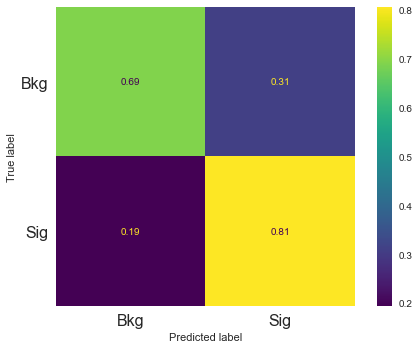

<Figure size 576x396 with 0 Axes>

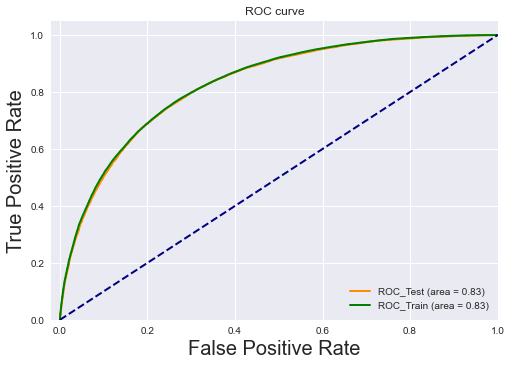

In [9]:
raw = np.asarray([1])
raw_cat = to_categorical(raw, 2)
print(f'{raw} to_categorical --> {raw_cat}')

score_train   = model.predict(x_train)
score_test    = model.predict(x_test)
print(f'prediction probabilities for test dataset :\n {score_test}')
y_predProbaNoCutOnProb = score_test[:,-1]
y_predClassNoCutOnProb = np.asarray([np.argmax(item) for item in score_test])
y_true                 = y_test[:,-1].astype(int)
y_predProbaNoCutOnProbTrain = score_train[:,-1]
y_predClassNoCutOnProbTrain = np.asarray([np.argmax(item) for item in score_train])
y_trueTrain                 = y_train[:,-1].astype(int)
print(f'y_test : \n {y_test}')
print(f'y_predication :\n {y_predClassNoCutOnProb}')
print(f'y_true :\n {y_true}')
cnf_matrix = confusion_matrix(y_true, y_predClassNoCutOnProb, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
disp.plot()
plt.grid(False)
plt.xticks(ticks=[1,0], labels=['Sig','Bkg'], fontsize=16)
plt.yticks(ticks=[1,0], labels=['Sig','Bkg'], fontsize=16)
plt.show()
plt.savefig(os.path.join(tagdir,'conf_matrix.png'), dpi=300)
plt.clf()

fpr_t, tpr_t, _ = roc_curve(y_trueTrain, y_predProbaNoCutOnProbTrain)
fpr, tpr, _ = roc_curve(y_true, y_predProbaNoCutOnProb)
roc_auc_t = auc(fpr_t, tpr_t)
roc_auc = auc(fpr, tpr)
#xgb.plot_importance(gbm)
#plt.show()
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC_Test (area = %0.2f)' % roc_auc)
plt.plot(fpr_t, tpr_t, color='green',
         lw=lw, label='ROC_Train (area = %0.2f)' % roc_auc_t)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',size=20)
plt.ylabel('True Positive Rate',size=20)
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.savefig(os.path.join(tagdir,'ROC.png'), dpi=300)
plt.show()